In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=3a3bb1808a90bfa5e37365afacf4c093d8e45a42f1535d34c922ad0bfadc301a
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
from google.colab import drive
# os.chdir('/content/gdrive/My Drive')
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x

if os.path.exists(os.getcwd()+"\\national.json"):
    os.remove(os.getcwd()+"\\national.json")
wget.download('https://api.covid19india.org/data.json', os.getcwd()+"//national.json")

if os.path.exists(os.getcwd()+"\\states.json"):
    os.remove(os.getcwd()+"\\states.json")
wget.download('https://api.covid19india.org/states_daily.json', os.getcwd()+"//states.json")

if os.path.exists(os.getcwd()+"\\test.json"):
    os.remove(os.getcwd()+"\\test.json")
wget.download('https://api.covid19india.org/state_test_data.json', os.getcwd()+"//test.json")

'/content//test.json'

In [0]:
dataset=pd.read_csv('/content/gdrive/My Drive/population.csv')

In [5]:
population=pd.DataFrame()
population["State"]=dataset['State'][:37]
population["Population"]=dataset['Population'][:37]
population

,State,Population
0,Delhi,18710922
1,Haryana,28204692
2,Kerala,35699443
3,Himachal Pradesh,7451955
4,Punjab,30141373
5,Telangana,39362732
6,Goa,1586250
7,Uttarakhand,11250858
8,Chandigarh,1158473
9,Gujarat,63872399


In [0]:
def fn(mon):
  if(mon == "01"):
    return " January"
  if(mon == "02"):
    return " February"
  if(mon == "03"):
    return " March"
  if(mon == "04"):
    return " April"
  if(mon == "05"):
    return " May"
  if(mon == "06"):
    return " June"
  if(mon == "07"):
    return " July"
  if(mon == "08"):
    return " August"
  if(mon == "09"):
    return " September"
  if(mon == "10"):
    return " October"
  if(mon == "11"):
    return " November"
  if(mon == "12"):
    return " December"
def convert(dat): 
    return  str(dat[:2]) + fn(str(dat[3:5]))

In [0]:
dates = np.array([pd.to_datetime(i['date']+"2020") for i in json.load(open('national.json',))['cases_time_series']])
confirmed = np.array([int(i['dailyconfirmed'])for i in json.load(open('national.json',))['cases_time_series']])
deceased = np.array([int(i['dailydeceased'])for i in json.load(open('national.json',))['cases_time_series']])
recovered = np.array([int(i['dailyrecovered'])for i in json.load(open('national.json',))['cases_time_series']])

confirmed = confirmed[dates>=pd.to_datetime("03/04/20")]
deceased = deceased[dates>=pd.to_datetime("03/04/20")]
recovered = recovered[dates>=pd.to_datetime("03/04/20")]
dates = dates[dates>=pd.to_datetime("03/04/20")]

In [8]:
conf = []

for n in range(100):
    print("Iteration: ",n+1,end='\r')
    dataset = np.copy(confirmed)
    mean = 13.0+(20.9-8.7)/4*np.random.normal()
    sd = 12.7+(26.0-6.4)/4*np.random.normal()
    phi = np.sqrt(sd**2 + mean**2)
    mu = np.log(mean**2/phi)
    sigma = np.sqrt(np.log(phi**2/mean**2))
    L = lognorm(s=sigma,scale=np.exp(mu))
    for i in range(len(dataset)-1,-1,-1):
        send_forward = np.round(L.rvs(dataset[i]))
        send_forward = send_forward[i+send_forward<len(dataset)]
        dataset[i] = 0
        for j in np.unique(np.int32(send_forward)):
            dataset[i+j] += np.sum(send_forward==j)
    conf.append(dataset)

In [9]:
CFR = np.cumsum(deceased)/np.cumsum(conf,axis=1)
col_mean = np.nanmean(CFR, axis=0)
inds = np.where(np.isnan(CFR))
CFR[inds] = np.take(col_mean, inds[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [0]:
temp=dates
dates=[]
for i in range(len(temp)):
  date=[]
  t=(str(temp[i])).split()[0]
  m=t[5:7]
  d=t[-2:]
  #print(m,t)
  date.append(d)
  date.append('/')
  date.append(m)
  date=''.join([str(elem) for elem in date])
  #print(date)
  dates.append(convert(date))

In [11]:
json_data = {}
india = {
        'dates':dates,
        'cfr1_point':list(n2z(np.cumsum(deceased)/np.cumsum(confirmed))),
        'cfr2_point':list(n2z(np.cumsum(deceased)/(np.cumsum(deceased)+np.cumsum(recovered)))),
        'cfr3_point':list(n2z(np.mean(CFR,axis=0))),
        'cfr3_l95':list(n2z(np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(np.quantile(CFR,0.75,axis=0))),
        }
json_data['India'] = india

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [0]:
states = list(filter(lambda v:len(v)<3,list(json.load(open('states.json',))['states_daily'][0].keys())))

In [0]:
dates = np.array([pd.to_datetime(i['date']) for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
#print(dates)
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for st in states:
    data_confirmed[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
    data_deceased[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Deceased',json.load(open('states.json',))['states_daily'])])
    data_recovered[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Recovered',json.load(open('states.json',))['states_daily'])])

In [0]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


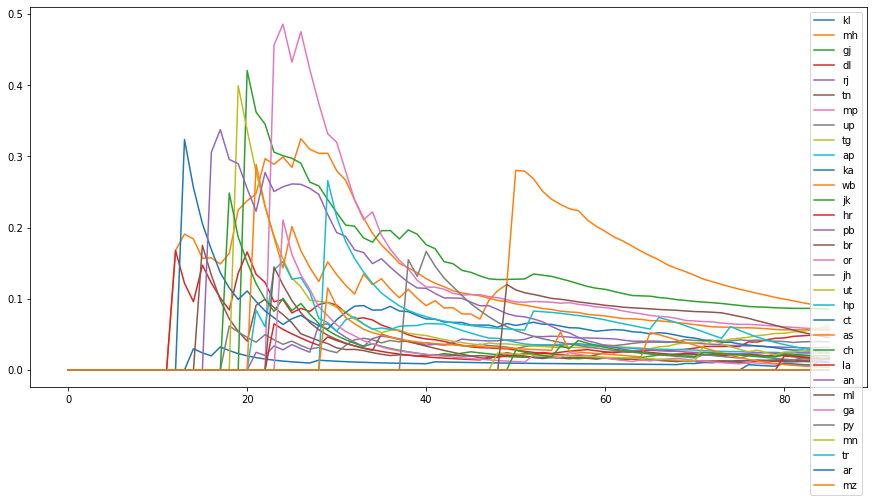

In [15]:
plt.figure(1, figsize=(15, 7))
state_id = {
  "kl":"Kerala",
  "mh":"Maharashtra",
  "gj":"Gujarat",
  "dl":"Delhi",
  "rj":"Rajasthan",
  "tn":"Tamil Nadu",
  "mp":"Madhya Pradesh",
  "up":"Uttar Pradesh",
  "tg":"Telangana",
  "ap":"Andhra Pradesh",
  "ka":"Karnataka",
  "wb":"West Bengal",
  "jk":"Jammu and Kashmir",
  "hr":"Haryana",
  "pb":"Punjab",
  "br":"Bihar",
  "or":"Odisha",
  "jh":"Jharkand",
  "ut":"Uttarakhand",
  "hp":"Himachal Pradesh",
  "ct":"Chhattisgarh",
  "as":"Assam",
  "ch":"Chandigarh",
  "la":"Ladakh",
  "an":"Andaman and Nicobar Islands",
  "ml":"Meghalaya",
  "ga":"Goa",
  "py":"Puducherry",
  "mn":"Manipur",
  "tr":"Tripura",
  "ar":"Arunachal Pradesh",
  "mz":"Mizoram" ,
}

for state in state_id.keys():
    boots = 100
    conf = []
    for n in range(boots):
        print("Iteration: ",n+1,end='\r')
        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    dates1=[]
    for i in range(len(temp1)):
      date=temp1[i][3:5]+'/'+temp1[i][0:2]
      dates1.append(convert(date))
    temp = {
        'dates':dates1,
        'cfr1_point':list(n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(np.mean(CFR,axis=0))),
        'cfr3_l95':list(n2z(np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(np.quantile(CFR,0.75,axis=0))),
        }
    a=state_id[state]
    #print(a)
    json_data[str(a)] = temp
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [0]:
with open('cfr.json', 'w') as outfile:
    json.dump(json_data, outfile)

In [0]:
total_confirmed = [x['totalconfirmed'].split(' ')[0] for x in json.load(open('national.json',))['cases_time_series']] ## x_cumulative= 'totalconfirmed'
daily_confirmed = [x['dailyconfirmed'].split(' ')[0] for x in json.load(open('national.json',))['cases_time_series']] ## x1
daily_confirmed_ma=[]
dates=[]
daily_confirmed=list(map(int,daily_confirmed))
for i in range(7,len(daily_confirmed)):
  daily_confirmed_ma.append(sum(daily_confirmed[i-7:i])//7)
datesspace = [x['date'] for x in json.load(open('national.json',))['cases_time_series'][:-1]]
for i in range(len(datesspace)):
  dates.append(datesspace[i][0:-1])

In [18]:
dates_dict = {}
count=1
for i in dates:
  if i not in dates_dict.keys():
    dates_dict[i]=count
    count+=1
print(dates_dict)

{'30 January': 1, '31 January': 2, '01 February': 3, '02 February': 4, '03 February': 5, '04 February': 6, '05 February': 7, '06 February': 8, '07 February': 9, '08 February': 10, '09 February': 11, '10 February': 12, '11 February': 13, '12 February': 14, '13 February': 15, '14 February': 16, '15 February': 17, '16 February': 18, '17 February': 19, '18 February': 20, '19 February': 21, '20 February': 22, '21 February': 23, '22 February': 24, '23 February': 25, '24 February': 26, '25 February': 27, '26 February': 28, '27 February': 29, '28 February': 30, '29 February': 31, '01 March': 32, '02 March': 33, '03 March': 34, '04 March': 35, '05 March': 36, '06 March': 37, '07 March': 38, '08 March': 39, '09 March': 40, '10 March': 41, '11 March': 42, '12 March': 43, '13 March': 44, '14 March': 45, '15 March': 46, '16 March': 47, '17 March': 48, '18 March': 49, '19 March': 50, '20 March': 51, '21 March': 52, '22 March': 53, '23 March': 54, '24 March': 55, '25 March': 56, '26 March': 57, '27 M

In [0]:
def convert(dat): 
    return  str(dat[:2]) + fn(str(dat[3:5]))

In [20]:
population['Population'][36]

1371360350

In [0]:
datest=[x['updatetimestamp'].split(' ')[0] for x in json.load(open('national.json',))['tested']]
#totalcumulative_tested = [] #y_cumulative
y_cumulative1=[x['totalsamplestested'] for x in json.load(open('national.json',))['tested']]
test_per_million=['']*len(dates)
dates1=[]
for i in (datest):
  dates1.append(convert(i))
datestest = []
datestest.append(dates1[0])
y_cumulative = []
y_cumulative.append(y_cumulative1[0])
### y = 'totalsamplestested'
#daily_tested = [] # y1 (y_cumulative2-ycumulative1)
for i in range(1,len(dates1)):
  if (dates1[i]==dates1[i-1]):
    y_cumulative[-1]=y_cumulative1[i]
  else:
    datestest.append(dates1[i])
    y_cumulative.append(y_cumulative1[i])
daily_tested=[]
daily_tested.append(y_cumulative[0])
for i in range(1,len(y_cumulative)):
  if (len(y_cumulative[i])!=0):
    a=int(y_cumulative[i])-int(y_cumulative[i-1])
    daily_tested.append(a)
    #test_per_million.append(int(y_cumulative[i])*1000000/int(population['Population'][36]))
  else:
    y_cumulative[i]=y_cumulative[i-1]
    daily_tested.append(0)
    #test_per_million.append('')
var=0
pos_rate_cum=['']*len(dates)
daily_pos_rate=['']*len(dates)
for i in range(len(datestest)):
  for j in range(var,len(dates)):
    if (datestest[i]==dates[j]):
      if (int(daily_tested[i])!=0):
        daily_pos_rate[j]=(int(daily_confirmed[j])/int(daily_tested[i]))
        pos_rate_cum[j]=(int(total_confirmed[j])/int(y_cumulative[i]))
        test_per_million[j]=(int(y_cumulative[i])*1000000/int(population['Population'][36]))
      else:
        daily_pos_rate[j]=('')
        #test_per_million.append('')
      var=j
      break
#print(len(y_cumulative))
#daily_confirmed_7day_moving = []
## India : date : []
##        cumulative pos rate : [] x_cum/y_cum
##        daily_pos_rate : []  (after taking moving avg) -> 7 observation moving avg
## daily confirmed : [] (7 day moving average)

In [22]:
# daily_pos_rate_ma=[]
# count=0
# for i in range(len(dates)):

# (India & states)
# Daily confirmed 2 lists : simple, moving avg
# Pos rate : cumulative 
#          : Daily - 2 lists simple, moving avg
len(daily_pos_rate)

129

In [0]:
daily_pos_rate_ma=['']*len(dates)
from statistics import mean
count=0
temp=['']*len(dates)

i=0
l=len(dates)
#print(datestest)
# for i in range(len(dates)):
#print(daily_pos_rate)

while i<l:
  # print(i)
  count+=1
  for j in range(len(datestest)):
    if (dates[i]==datestest[j]):
      a=daily_pos_rate[i]
      temp[i]=str(a)
      #print(daily_pos_rate[j])
      #break
   
  #print(temp)
  
  for k in range(7,len(temp)):
    sum=0
    counter=0
    for m in range(0,7):
      if (len(str(temp[k-m]))!=0):
        sum+=float(temp[k-m])
      else:
        counter+=1
    if ((7-counter)!=0):
      daily_pos_rate_ma[k]=(sum/(7-counter))
      #daily_pos_rate_ma.append(sum/(7-counter))
     
  i=i+1
  '''
  if (count==7):
    #print(temp)
    if (len(temp)>0):
      daily_pos_rate_ma.append(mean(temp))
      temp=[]
    else:
      daily_pos_rate_ma.append(0)
    count=0
    i=i-6
  '''

In [0]:
india_dates = dates
india_daily_confirmed = daily_confirmed
india_daily_confirmed_ma = daily_confirmed_ma
india_total_confirmed = total_confirmed
india_daily_pos_rate_ma = daily_pos_rate_ma
india_pos_rate_cum = pos_rate_cum
india_daily_pos_rate = daily_pos_rate
india_test_per_million=test_per_million
# nationwide={
#     'dates':dates,
#     'daily_confirmed':daily_confirmed,
#     'daily_confirmed_ma':daily_confirmed_ma,
#     'daily_total':total_confirmed,
#     'daily_positve_rate_ma':daily_pos_rate_ma
# }
# with open('nation.json', 'w') as outfile:
#     json.dump(nationwide, outfile)

### State Level Data

In [0]:
population=population.set_index('State')

In [34]:
testing = {}
states = np.unique([x['state'] for x in json.load(open('test.json',))['states_tested_data']])
for st in states:
  state_dates = []
  test_per_million=['']*len(dates)
  pos_cum=['']*len(dates)
  pos_rate_cum=['']*len(dates)
  daily_pos=['']*len(dates)
  daily_pos_ma=['']*len(dates)
  daily_tested=['']*len(dates)
  daily_pos_rate=['']*len(dates)
  daily_pos_rate_ma=['']*len(dates)
  tested_cum=['']*len(dates)
  tested_daily=['']*len(dates)
  state_date = [x['updatedon'] for x in filter(lambda v: v['state'] == st,json.load(open('test.json',))['states_tested_data'])]
  #rates = [x['testpositivityrate'] for x in filter(lambda v: v['state'] == st,json.load(open('test.json',))['states_tested_data'])]
  #print(state_date)
  for i in (state_date):
    state_dates.append(convert(i))
  for i in range(len(dates)):
    for j in range(len(state_dates)):
      sum=0
      count=0
      sum1=0
      count1=0
      if (dates[i]==state_dates[j]):
        pos_cum[i] = [x['positive'] for x in filter(lambda v: v['state'] == st,json.load(open('test.json',))['states_tested_data'])][j]
        tested_cum[i] = [x['totaltested'] for x in filter(lambda v: v['state'] == st,json.load(open('test.json',))['states_tested_data'])][j]
        if (j==0):
          daily_pos[i]=pos_cum[j]
          daily_tested[i]=tested_cum[j]
        if(len(pos_cum[i])!=0 and len(pos_cum[i-1])!=0):
          daily_pos[i]=int(pos_cum[i])-int(pos_cum[i-1]) 
          #print(daily_pos[i])
        if(st=='Andaman and Nicobar Islands'):
          daily_pos[i]=pos_cum[i]
        if(len(tested_cum[i])!=0 and len(tested_cum[i-1])!=0):
          daily_tested[i]=(int(tested_cum[i])-int(tested_cum[i-1]))
          test_per_million[i]=int(tested_cum[i])*1000000/int(population["Population"][st])
          if (len(str(daily_pos[i]))!=0 and len(str(tested_cum[i]))!=0):
            pos_rate_cum[i]=int(pos_cum[i])*100/int(tested_cum[i])
          #if(st=='Maharashtra'):
            #print(tested_cum[i],daily_tested[i])
        if (j>6):
          for k in range(0,7):
            if (len(str(daily_pos[i-k]))!=0):
              count+=1
              sum+=daily_pos[i-k]
          if (count!=0):
            daily_pos_ma[i]=sum/count
          if(len(str(daily_tested[i]))!=0 and daily_tested[i]!=0 and len(str(daily_pos[i]))!=0 ):
            daily_pos_rate[i]=(int(daily_pos[i])/int(daily_tested[i]))
        if (j>6):
          for k in range(0,7):
            if (len(str(daily_pos_rate[i-k]))!=0):
              count1+=1
              sum1+=daily_pos_rate[i-k]
            if (count1!=0):
             daily_pos_rate_ma[i]=sum1/count1
  print(st,pos_rate_cum)
  testing[st] = {
                    'dates':dates,
                    'positivity_rate_cumulative':pos_rate_cum,
                    'daily_positive_cases':daily_pos,
                    'daily_positivity_rate':daily_pos_rate,
                    'daily_positive_cases_ma': daily_pos_ma,
                    'daily_positivity_rate_ma':daily_pos_rate_ma , 
                    'test_per_million':test_per_million,          
                  }
testing['India'] = {
                    'dates': india_dates,
                    'positivity_rate_cumulative': india_pos_rate_cum,
                    'daily_positive_cases': india_daily_confirmed,
                    'daily_positivity_rate': india_daily_pos_rate,
                    'daily_positive_cases_ma': india_daily_confirmed_ma,
                    'daily_positivity_rate_ma': india_daily_pos_rate_ma,
                    'test_per_million':india_test_per_million,
                    
                  }


Andaman and Nicobar Islands ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
Andhra Pradesh ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 5.4757114113250935, 5.82063811440069, 4.934323243860651, 4.50261780104712, 4.520795660036167, 2.6389918458117125, 2.8267852730417595, 2.811188811188811

In [0]:
with open('positivity_Rate.json', 'w') as outfile:
    json.dump(testing, outfile,indent=4)